In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
dta = sm.datasets.fair.load_pandas().data
import pickle

In [2]:
print(dta.tail(5))
dta.head(5)

      rate_marriage   age  yrs_married  children  religious  educ  occupation  \
6361            5.0  32.0         13.0       2.0        3.0  17.0         4.0   
6362            4.0  32.0         13.0       1.0        1.0  16.0         5.0   
6363            5.0  22.0          2.5       0.0        2.0  14.0         3.0   
6364            5.0  32.0          6.0       1.0        3.0  14.0         3.0   
6365            4.0  22.0          2.5       0.0        2.0  16.0         2.0   

      occupation_husb  affairs  
6361              3.0      0.0  
6362              5.0      0.0  
6363              1.0      0.0  
6364              4.0      0.0  
6365              4.0      0.0  


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [26]:
dta['affair'] = (dta.affairs > 0).astype(int)
dta.tail(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [4]:
data=dta.groupby('affair').mean()
data # avg rate of marriage is lower for affair

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [5]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Text(0, 0.5, 'frequency')

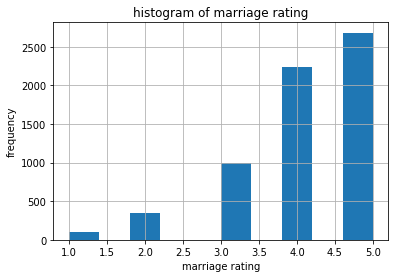

In [6]:
dta.rate_marriage.hist()
plt.title('histogram of marriage rating')
plt.xlabel('marriage rating')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

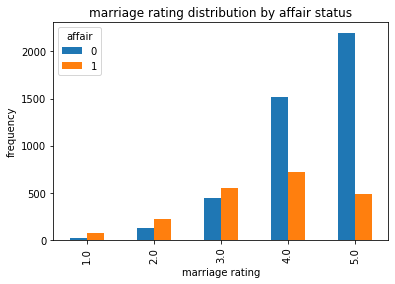

In [7]:
pd.crosstab(dta.rate_marriage,dta.affair).plot(kind='bar')
plt.title('marriage rating distribution by affair status')
plt.xlabel('marriage rating')
plt.ylabel('frequency')

Text(0, 0.5, 'percentage')

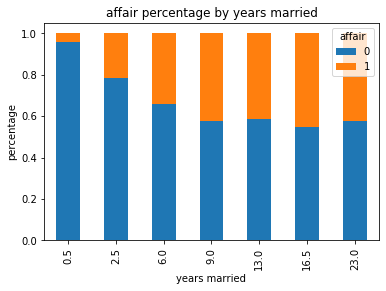

In [8]:
affair_marriage = pd.crosstab(dta.yrs_married,dta.affair)
affair_marriage.div(affair_marriage.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('affair percentage by years married')
plt.xlabel('years married')
plt.ylabel('percentage')

In [9]:
x=dta.drop(columns=['affair'])
y=dta['affair']
x.head(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [10]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [12]:
model = LogisticRegression()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))

0.9578096947935368


In [14]:
pd.DataFrame(list(zip(x.columns,np.transpose(model.coef_))))

,0,1
0,rate_marriage,[-0.4302091734871452]
1,age,[-0.4255887594390448]
2,yrs_married,[0.9193674690139888]
3,children,[0.09736742646140975]
4,religious,[-0.19598552434497565]
5,educ,[-0.030478456703003757]
6,occupation,[0.1082868804380212]
7,occupation_husb,[0.028323145689970138]
8,affairs,[19.126011145587498]


In [24]:
y_test_predict = model.predict(x_test)
rmse_test = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
r_squr_test=r2_score(y_test,y_test_predict)
print('RMSE is {} for the testing set'.format(rmse_test))
print('r_square is {} for the testing set'.format(r_squr_test))

RMSE is 0.19683357309509525 for the testing set
r_square is 0.8212969436896984 for the testing set


In [16]:
from sklearn.metrics import mean_squared_error,r2_score
y_predict = model.predict(x_train)
rmse= (np.sqrt(mean_squared_error(y_train,y_predict)))
r_sqr=r2_score(y_train,y_predict)

In [17]:
print('RMSE is {}  for the training set'.format(rmse))
print('r_square error is {} for the training set '.format(r_sqr))

RMSE is 0.2054027877280715  for the training set
r_square error is 0.807527696980558 for the training set 


In [18]:
probs = model.predict_proba(x_test)
print(probs)

[[8.57039411e-01 1.42960589e-01]
 [9.82524783e-01 1.74752173e-02]
 [9.49040021e-01 5.09599787e-02]
 ...
 [9.25455626e-01 7.45443737e-02]
 [9.68928160e-01 3.10718404e-02]
 [7.03359999e-07 9.99999297e-01]]


In [19]:
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,probs[:, 1]))

0.9612565445026178
0.996031209185241


In [20]:
print(metrics.confusion_matrix(y_test,predicted)) # confusion matircs to how much model is good 
print(metrics.classification_report(y_test,predicted))

[[1303    0]
 [  74  533]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1303
           1       1.00      0.88      0.94       607

    accuracy                           0.96      1910
   macro avg       0.97      0.94      0.95      1910
weighted avg       0.96      0.96      0.96      1910



In [25]:
dta.head(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [21]:
filename = "final_model.pickle"
pickle.dump(model, open(filename,'wb'))

In [22]:
load_model = pickle.load(open(filename,'rb'))
a=load_model.predict(scaler.transform([[3,27,13,3,1,14,3,4,3.230769]]))

In [23]:
if a==0:
    print('she has no affair')
else:
    print('she has affair')

she has affair
